Dataset Loaded Successfully!
              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat y

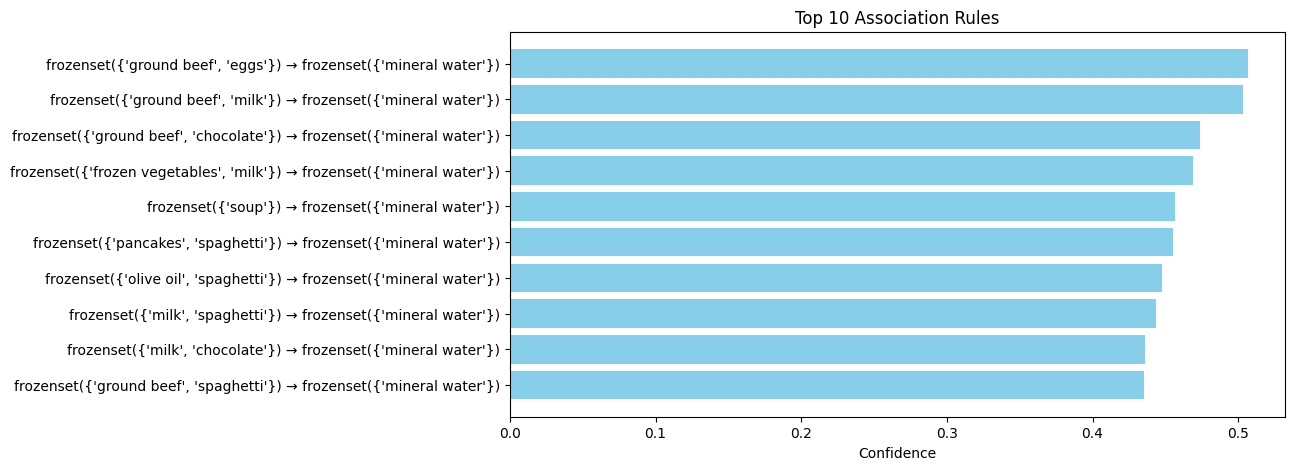

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# ----------------------------------------
# STEP 1: Load Dataset (NO HEADER)
# ----------------------------------------
df = pd.read_csv("Order2.csv", header=None)
print("Dataset Loaded Successfully!")
print(df.head())

# ----------------------------------------
# STEP 2: Data Pre-processing
# Convert each row into a transaction (list of items)
# ----------------------------------------
transactions = df.apply(lambda row: row.dropna().astype(str).tolist(), axis=1).tolist()

print("\nSample Transaction:", transactions[0])

# ----------------------------------------
# STEP 3: One-Hot Encoding
# ----------------------------------------
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_array, columns=te.columns_)

# ----------------------------------------
# STEP 4: Apply Apriori Algorithm
# ----------------------------------------
frequent_items = apriori(basket, min_support=0.01, use_colnames=True)
print("\nFrequent Itemsets:")
print(frequent_items.head())

# ----------------------------------------
# STEP 5: Generate Association Rules
# ----------------------------------------
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
print("\nTop 10 Rules:")
print(rules[['antecedents','consequents','support','confidence','lift']].head(10))

# ----------------------------------------
# STEP 6: Visualization of Rules
# ----------------------------------------
top10 = rules.sort_values(by="confidence", ascending=False).head(10)
top10['rule'] = top10['antecedents'].astype(str) + " → " + top10['consequents'].astype(str)

plt.figure(figsize=(10,5))
plt.barh(top10['rule'], top10['confidence'], color='skyblue')
plt.xlabel("Confidence")
plt.title("Top 10 Association Rules")
plt.gca().invert_yaxis()
plt.show()
